According to the famous CAPM, the expected returns of a stock are linearly
correlated with expected market returns. Here, we use the international business
machine with a ticker of IBM as an example and this linear one-factor asset pricing
model could be applied to any other stocks or portfolios. The formula is given here:
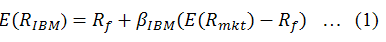

Here, E() is the expectation, E(RIBM) is the expected return for IBM, Rf is the
risk-free rate, and E(Rmkt) is the expected market return. For instance, the S&P500
index could be served as a market index. The slope of the preceding equation or
is a measure of IBM's market risk. To make our notation simpler, the expectation
could be dropped: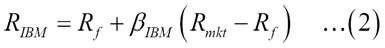

Actually, we could consider the relationship between the excess stock returns and
the excess market returns. The following formula is essentially the same as the
preceding formula, but it has a better and clearer interpretation:
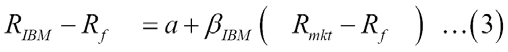

Recall that in Chapter 3, Time Value of Money, we learnt that the difference between a
stock's expected return and the risk free rate is called risk premium. This is true for
both individual stocks and for a market index. Thus, the meaning of the Equation
(3) is quite easy to interpret: the risk premium of individual stock depends on two
components: its market risk and the market risk-premium.

Mathematically, the slop of the preceding linear regression could be written
as follows:
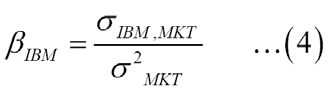

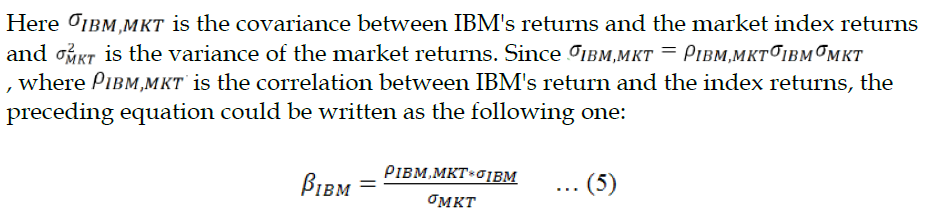

The meaning of beta is that when the expected market risk-premium increases by
1%, the individual stock's expected return would increase by β%, vice versa. Thus,
beta (market risk) could be viewed as an amplifier. The average beta of all stocks is
one. Thus, if a stock's beta is higher than 1, it means that its market risk is higher than
that of an average stock.
The following lines of code are an example of this:

In [2]:
import numpy as np
import statsmodels.api as sm
y=[1,2,3,4,2,3,4]
x=range(1,8)
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
print(results.params)
print(results.summary())

[1.28571429 0.35714286]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.630
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0841
Time:                        16:08:29   Log-Likelihood:                -7.8466
No. Observations:                   7   AIC:                             19.69
Df Residuals:                       5   BIC:                             19.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2857      0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


The beta is 0.3571, which has a T-value of 2.152. Since it is bigger than 2,
we could claim that it is significantly different from zero. Alternatively, based on
the P-value of 0.084, we would have the same conclusion if we choose a 10% as our
cut-off point. Here is the second example:

In [3]:
from scipy import stats
ret = [0.065, 0.0265, -0.0593, -0.001,0.0346]
mktRet = [0.055, -0.09, -0.041,0.045,0.022]
(beta, alpha, r_value,p_value,std_err)=stats.linregress(ret,mktRet)

In [4]:
print(beta, alpha)

print("R-squared=", r_value**2)
print("p-value =", p_value)

0.5077431878770808 -0.008481900352462384
R-squared= 0.1478856629663111
p-value = 0.5227155239089462


Now let's look at how to estimate the beta (market risk) for Microsoft. Assume that
we are interested in the period from 1/1/2012 to 12/31/2016, for a total of five year's
data. The complete Python program is shown here:

In [ ]:
from scipy import stats
from matplotlib.finance import quotes_historical_yahoo_ochl as getData
begdate=(2012,1,1)
enddate=(2016,12,31)
ticker='MSFT'
p =getData(ticker, begdate, enddate,asobject=True,adjusted=True)
retIBM = p.aclose[1:]/p.aclose[:1]-1
ticker='GSPC'
p2 = getData(ticker, begdate, enddate,asobject=True,adjusted=True)
retMkt = p2.aclose[1:]/p2.aclose[:1]-1
(beta,alpha,r_value,p_value,std_err)=stats.linregress(retMkt,retIBM)
print(alpha,beta)
print("R-squared=", r_value**2)
print("p-value =", p_value)

In [ ]:
from scipy import stats
from matplotlib.finance import quotes_historical_yahoo_ochl as aa
#
def dailyReturn(ticker,begdate,enddate):
p = aa(ticker, begdate,enddate,asobject=True,adjusted=True)
return p.aclose[1:]/p.aclose[:-1]-1
#
begdate=(2012,1,1)
enddate=(2017,1,9)
retIBM=dailyReturn("wmt",begdate,enddate)
retMkt=dailyReturn("^GSPC",begdate,enddate)
outputs=stats.linregress(retMkt,retIBM)
print(outputs)

## Moving beta
Sometimes, researchers need to generate a beta time series based on, for example,
a three-year moving window. In such cases, we could write a loop or double loops.
Let's look at a simpler case: estimating the annual beta for IBM over several years.
First, let's look at two ways of getting years from a date variable:

In [ ]:
import datetime
today=datetime.date.today()
year=today.year
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from matplotlib.finance import quotes_historical_yahoo_ochl
def ret_f(ticker,begdate, enddate):
p = quotes_historical_yahoo_ochl(ticker, begdate,
enddate,asobject=True,adjusted=True)
return((p.aclose[1:] - p.aclose[:-1])/p.aclose[:-1])
#
begdate=(2010,1,1)
enddate=(2016,12,31)
#
y0=pd.Series(ret_f('IBM',begdate,enddate))
x0=pd.Series(ret_f('^GSPC',begdate,enddate))
#
d=quotes_historical_yahoo_ochl('GSPC', begdate, enddate,asobject=True
,adjusted=True).date[0:-1]
lag_year=d[0].strftime("%Y")
y1=[]
x1=[]
beta=[]
index0=[]
for i in sp.arange(1,len(d)):
    year=d[i].strftime("%Y")
    if(year==lag_year):
        x1.append(x0[i])
        y1.append(y0[i])
    else:
        (beta,alpha,r_value,p_value,std_err)=stats.linregress(y1,x1)
        alpha=round(alpha,8)
        beta=round(beta,3)
        r_value=round(r_value,3)
        p_vaue=round(p_value,3)
        print(year,alpha,beta,r_value,p_value)
        x1=[]
        y1=[]
        lag_year=year

## Adjusted beta
Many researchers and professionals find that beta has a mean-reverting tendency. It
means that if this period's beta is less than 1, there is a good chance that the next beta
would be higher. On the other hand, if the current beta is higher than 1, the next beta
might be smaller. The adjusted beta has the following formula:
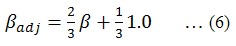

Here, βadj is the adjusted beta and β is our estimated beta. The beta of a portfolio is
the weighted beta of individual stocks within the portfolio:
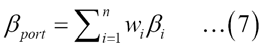

Here is the beta of a portfolio, wi (βi) is the weight (beta) of its stock, and n is
the number of stocks in the portfolio. The weight of wi is calculated according to the
following equation:
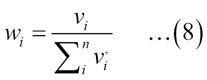

Here vi is the value of stock i, and summation of all vi, the denominator in the
preceding equation is the value of the portfolio.